# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data represents 17 marketing campaigns that occurred between May 2008 and November 2010. In total, there are 79,354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Check for missing values
missing_values = df.isnull().sum()

In [5]:
# Display columns with missing values
print("Missing Values per Column:\n", missing_values[missing_values > 0])

Missing Values per Column:
 Series([], dtype: int64)


In [6]:
# Categorical vs. numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:\n", categorical_cols)
print("\nNumerical Columns:\n", numerical_cols)




Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Numerical Columns:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective:

The goal is to increase the efficiency of the advertising campaign for the deposit descriptions and to see which model can best predict the success of the marketing campaigns. The four models chosen for this experiment are Logistic Regression, K-Nearest Neighbor, Decision Tree, and Support Vector Machine(SVM).

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
# Drop the duration column
df.drop(columns=['duration'], inplace=True)

# One-hot encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode the target column 'y'
df_encoded['y'] = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Prepare the feature matrix (X) and target vector (y)
X = df_encoded.drop(columns=['y'])  # Features (all columns except 'y')
y = df_encoded['y']  # Target (the 'y' column)

# Check shape
print("Features shape:", X.shape)
print("Target shape:", y.shape)
X.head()

Features shape: (41188, 52)
Target shape: (41188,)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False


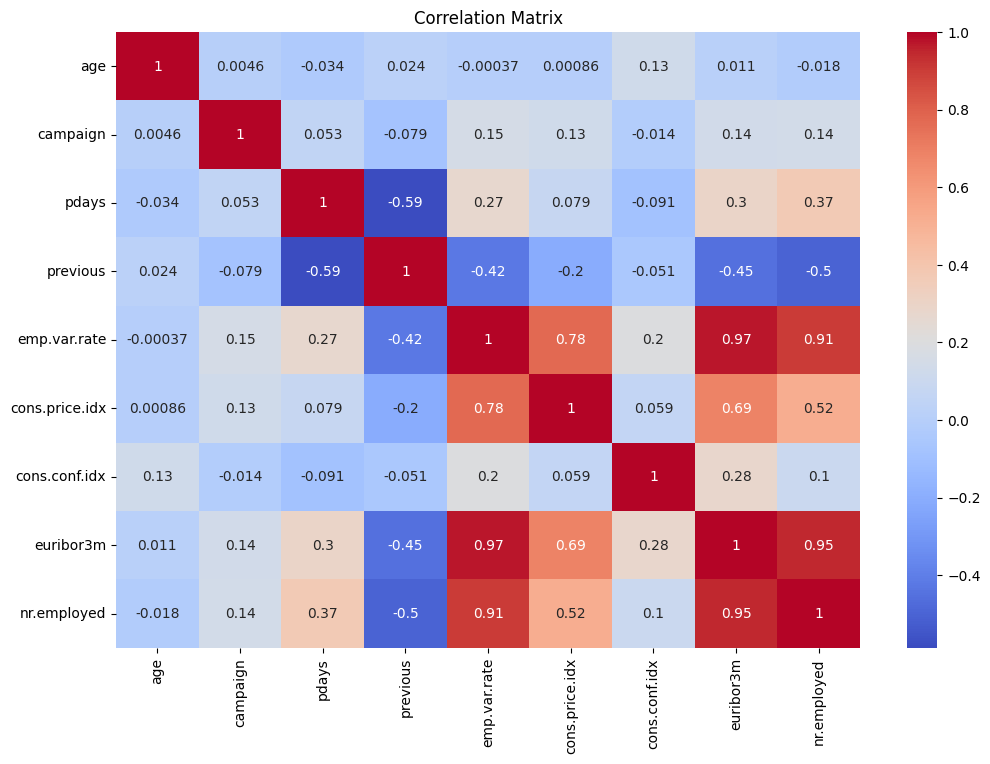

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix on numerical features only
corr_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
from sklearn.model_selection import train_test_split

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (32950, 52)
X_test shape: (8238, 52)
y_train shape: (32950,)
y_test shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [11]:
# Calculate the class distribution
class_distribution = y.value_counts(normalize=True)
print("Class Distribution (as percentage):")
print(class_distribution * 100)

# Set the baseline accuracy as the most frequent class
baseline_accuracy = class_distribution.max()
print(f"\nBaseline Accuracy: {baseline_accuracy * 100:.2f}%")


Class Distribution (as percentage):
y
0    88.734583
1    11.265417
Name: proportion, dtype: float64

Baseline Accuracy: 88.73%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit model on training data
log_reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

### Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression Test Accuracy: 89.63%


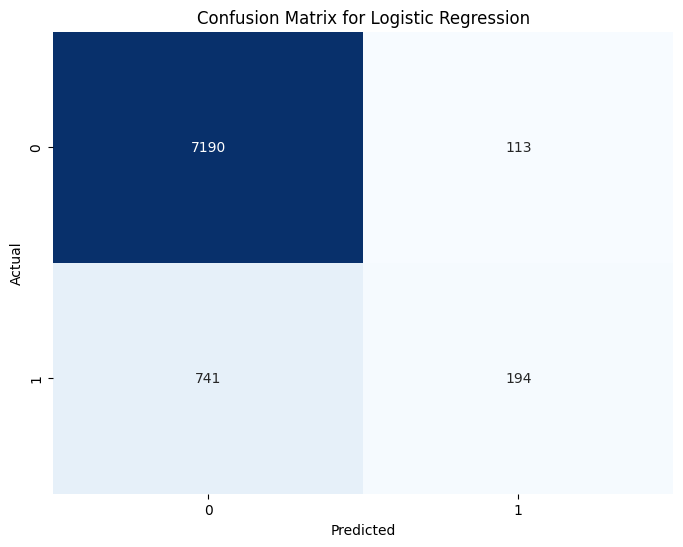

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on test data
y_pred = log_reg.predict(X_test)

# Calc accuracy on test set
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy
print(f"Logistic Regression Test Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
            
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


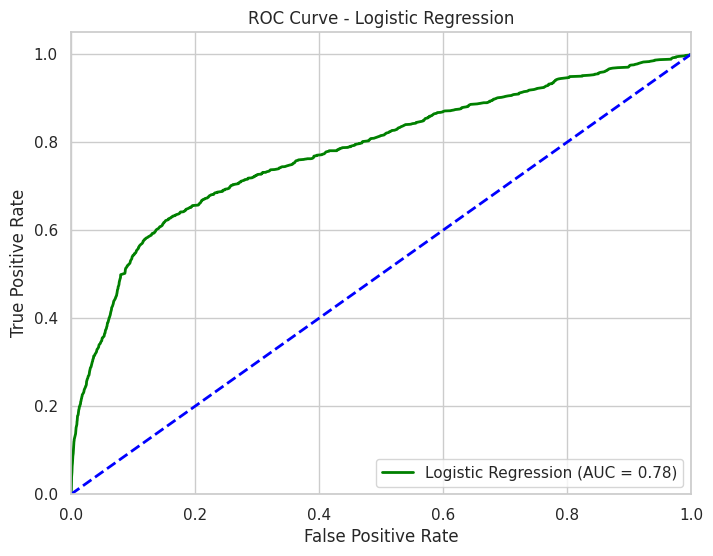

In [14]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
sns.set(style="whitegrid")

# Predict probabilities
y_proba_logreg = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)

# Calculate AUC
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_logreg, y=tpr_logreg, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## K-Nearest Neighbor Model

KNN Test Accuracy: 88.83%


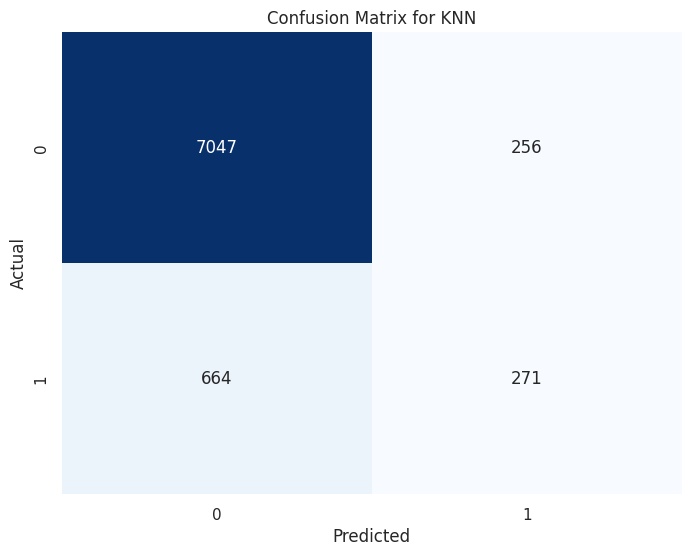

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier()

# Fit model on training data
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Calc accuracy on test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Display accuracy
print(f"KNN Test Accuracy: {accuracy_knn * 100:.2f}%")

# Create confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

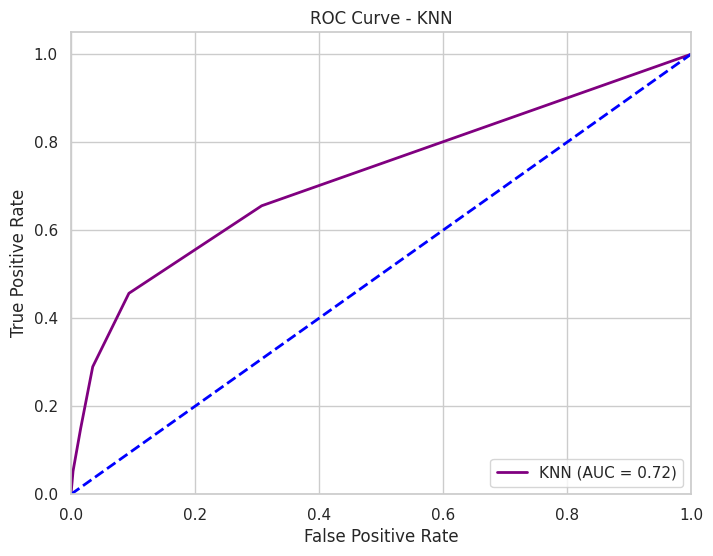

In [16]:
# Predict probabilities
y_proba_knn = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_knn, y=tpr_knn, color='purple', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Model

Decision Tree Test Accuracy: 83.75%


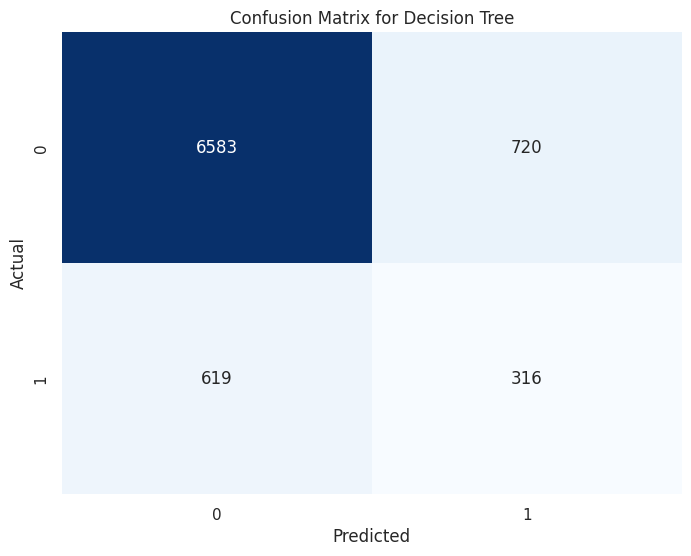

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit model on training data
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)

# Calculate accuracy on test set
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Display accuracy
print(f"Decision Tree Test Accuracy: {accuracy_tree * 100:.2f}%")

# Create confusion matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

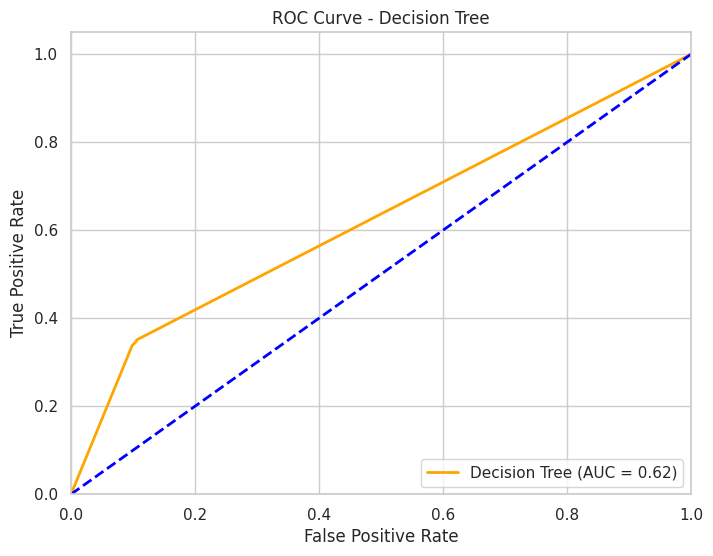

In [18]:
# Predict probabilities
y_proba_tree = decision_tree.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)

# Calculate AUC
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_tree, y=tpr_tree, color='orange', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## SVM Model

SVM Test Accuracy: 89.48%


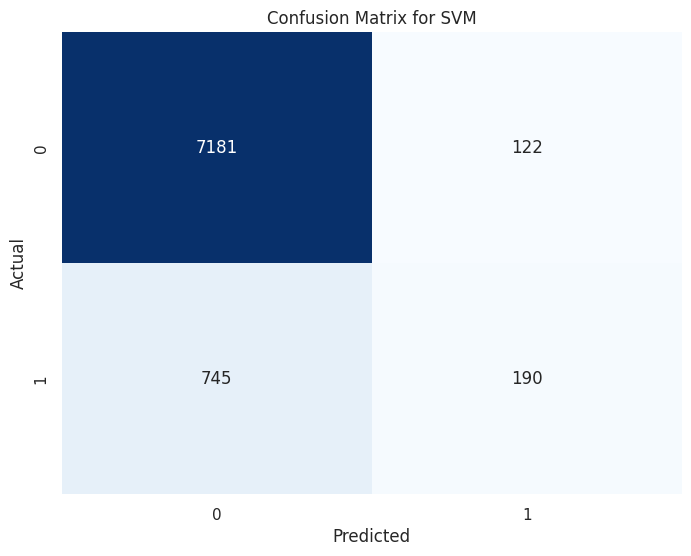

In [19]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(random_state=42)

# Fit model on training data
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy on test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Display accuracy
print(f"SVM Test Accuracy: {accuracy_svm * 100:.2f}%")

# Create a confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

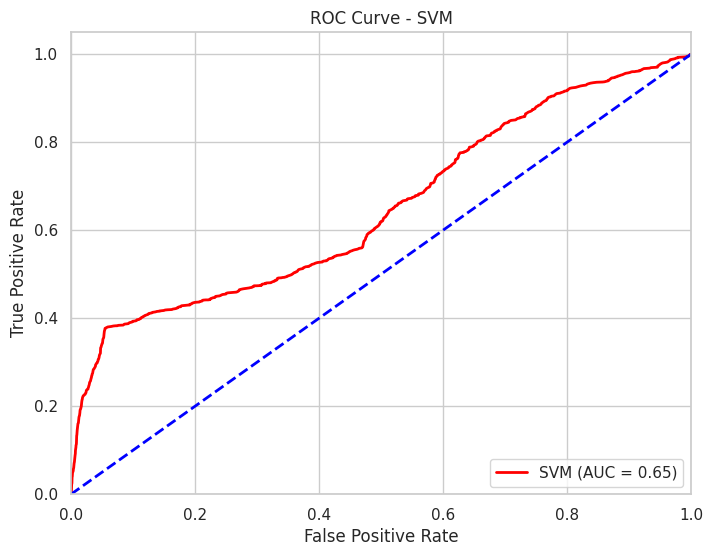

In [20]:
# Predict probabilities using decision_function (since SVM doesn't use predict_proba by default)
y_proba_svm = svm_model.decision_function(X_test)

# Calculate ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_svm, y=tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

# All Models Comparison

In [21]:
from time import time
from sklearn.metrics import accuracy_score

# Initialize all 4 models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Create a list to store results
results_list = []

# Loop through each model, fit, and score it
for model_name, model in models.items():
    # Measure training time
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    # Calculate training acc
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    # Calculate test acc
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Append results to the list
    results_list.append({
        "Model": model_name,
        "Train Time (s)": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results_list)

print(results_df)



                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression        3.253930        0.901548       0.896334
1                  KNN        0.062405        0.914719       0.888322
2        Decision Tree        0.373749        0.995357       0.837461
3                  SVM       28.857099        0.898209       0.894756


# Plot of Comparison

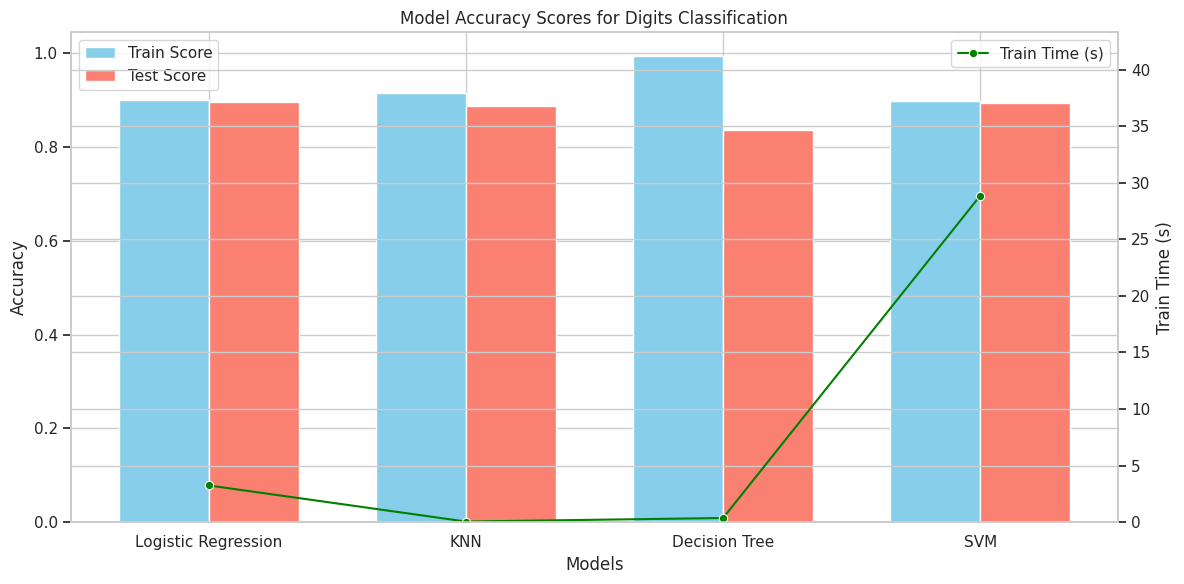

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set style for seaborn
sns.set(style="whitegrid")

# Initialize figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width and index setup
bar_width = 0.35  # Width for bars to be side-by-side
index = np.arange(len(results_df))

# Define the positions for each set of bars
train_bar_positions = index  # Train bars will stay at the original positions
test_bar_positions = index + bar_width  # Test bars shifted to the right by bar_width

# Plot Train Accuracy bars
ax1.bar(train_bar_positions, results_df['Train Accuracy'], width=bar_width, color='skyblue', label='Train Score')

# Plot Test Accuracy bars
ax1.bar(test_bar_positions, results_df['Test Accuracy'], width=bar_width, color='salmon', label='Test Score')

# Set axis, labels, title
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Scores for Digits Classification')
ax1.set_xticks(index + bar_width / 2)  # Ensure the tick labels are between both bar groups
ax1.set_xticklabels(results_df['Model'])
ax1.legend(loc='upper left')

# Create a secondary y-axis for the training time
ax2 = ax1.twinx()
sns.lineplot(x=index + bar_width / 2, y=results_df['Train Time (s)'], ax=ax2, color='green', marker='o', label='Train Time (s)')

# Set the label, limit, plot
ax2.set_ylabel('Train Time (s)')
ax2.set_ylim(0, max(results_df['Train Time (s)']) * 1.5)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

# Change to 40/60 training/testing ratio

In [23]:
# Perform train/test split with a 40/60 train/test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16475, 52)
X_test shape: (24713, 52)
y_train shape: (16475,)
y_test shape: (24713,)


In [24]:
from time import time
from sklearn.metrics import accuracy_score

# Initialize all 4 models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Create a list to store results
results_list = []

# Loop through each model, fit, and score it
for model_name, model in models.items():
    # Measure training time
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    # Calculate training acc
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    # Calculate test acc
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Append results to the list
    results_list.append({
        "Model": model_name,
        "Train Time (s)": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results_list)

print(results_df)

# SVM training time takes less time, slightly better results all around.

                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression        1.715052        0.902883       0.898798
1                  KNN        0.022779        0.913748       0.887711
2        Decision Tree        0.143072        0.997451       0.841581
3                  SVM        6.695299        0.900030       0.895844


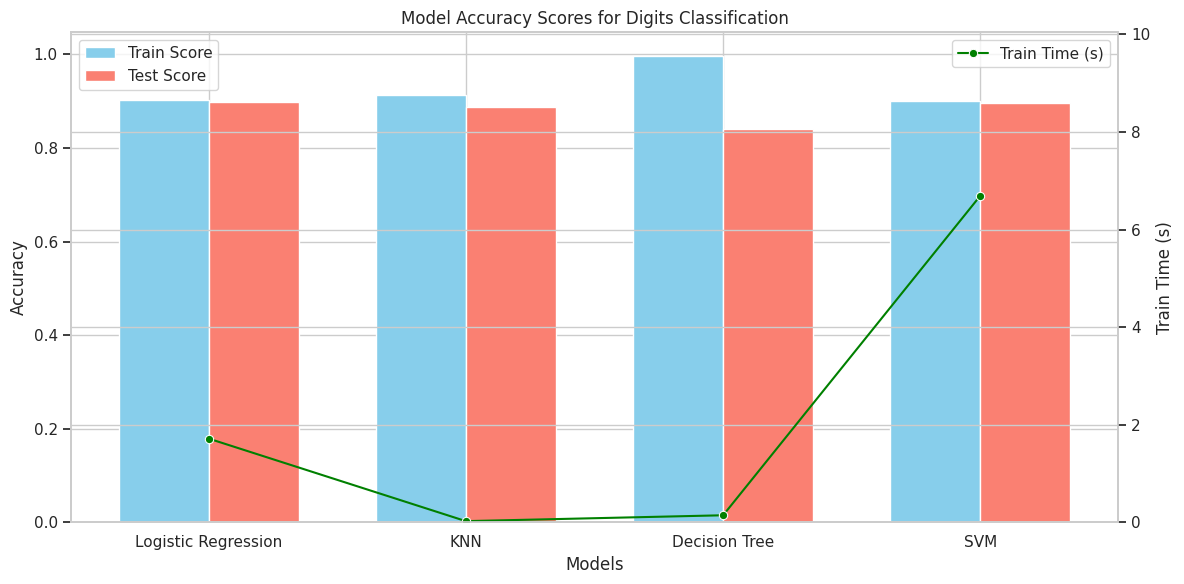

In [25]:
# set style for seaborn
sns.set(style="whitegrid")

# Initialize figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width and index setup
bar_width = 0.35  # Width for bars to be side-by-side
index = np.arange(len(results_df))

# Define the positions for each set of bars
train_bar_positions = index  # Train bars will stay at the original positions
test_bar_positions = index + bar_width  # Test bars shifted to the right by bar_width

# Plot Train Accuracy bars
ax1.bar(train_bar_positions, results_df['Train Accuracy'], width=bar_width, color='skyblue', label='Train Score')

# Plot Test Accuracy bars
ax1.bar(test_bar_positions, results_df['Test Accuracy'], width=bar_width, color='salmon', label='Test Score')

# Set axis, labels, title
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Scores for Digits Classification')
ax1.set_xticks(index + bar_width / 2)  # Ensure the tick labels are between both bar groups
ax1.set_xticklabels(results_df['Model'])
ax1.legend(loc='upper left')

# Create a secondary y-axis for the training time
ax2 = ax1.twinx()
sns.lineplot(x=index + bar_width / 2, y=results_df['Train Time (s)'], ax=ax2, color='green', marker='o', label='Train Time (s)')

# Set the label, limit, plot
ax2.set_ylabel('Train Time (s)')
ax2.set_ylim(0, max(results_df['Train Time (s)']) * 1.5)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Grid Search and ROC Curve Improvements

## Decision Tree

In [26]:
import logging
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Suppress joblib processing output
logging.getLogger('joblib').setLevel(logging.WARNING)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=0)

# Fit the grid search to data
grid_search.fit(X_train, y_train)

# Print only the best parameters and score
print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Best Score for Decision Tree:", grid_search.best_score_)




Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best Score for Decision Tree: 0.9025189681335357


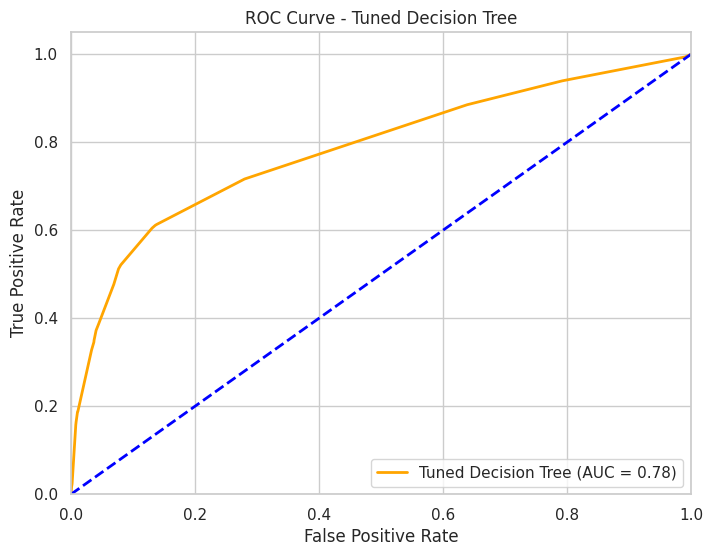

In [27]:
# Retrieve the best model for Decision Tree Model
best_tree = grid_search.best_estimator_

# Predict probabilities on the test set
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Calc ROC curve and AUC for the best Decision Tree model
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC curve for the tuned Decision Tree
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_tree, y=tpr_tree, color='orange', lw=2, label=f'Tuned Decision Tree (AUC = {roc_auc_tree:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Decision Tree')
plt.legend(loc="lower right")
plt.show()

## K Nearest Neighbor

In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN
knn_model = KNeighborsClassifier()

# Set up GridSearchCV
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search_knn.fit(X_train, y_train)

# Display best parameters and score
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Score for KNN:", grid_search_knn.best_score_)



Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score for KNN: 0.8977238239757208


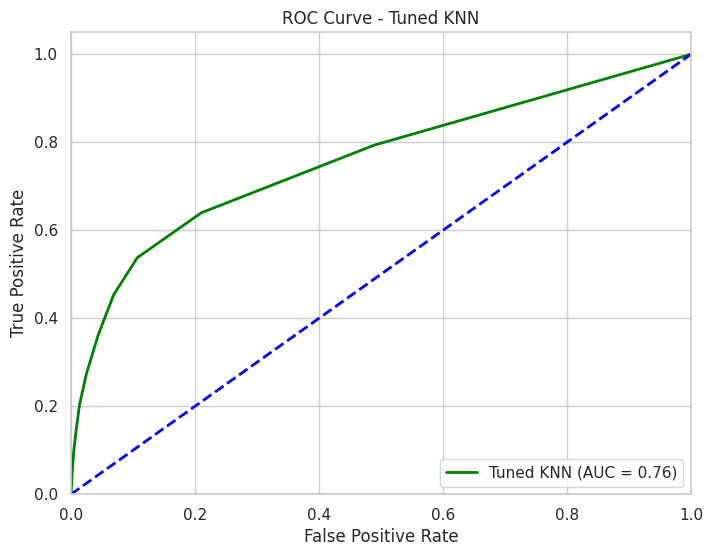

In [29]:
# Retrieve the best model for KNN
best_knn = grid_search_knn.best_estimator_

# Predict probabilities on the test set
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

# Calc ROC curve and AUC for the best KNN model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for the tuned KNN
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_knn, y=tpr_knn, color='green', lw=2, label=f'Tuned KNN (AUC = {roc_auc_knn:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned KNN')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [30]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_reduced = pca.fit_transform(X_train)  # Transform the training set
X_test_reduced = pca.transform(X_test)  # Transform the test set

# Small grid search for Log
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=3)
log_reg_grid.fit(X_train_reduced, y_train)

print("Best Parameters for Logistic Regression:", log_reg_grid.best_params_)
print("Logistic Regression Score with Grid Search:", log_reg_grid.score(X_test_reduced, y_test))




Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Score with Grid Search: 0.8980293772508396


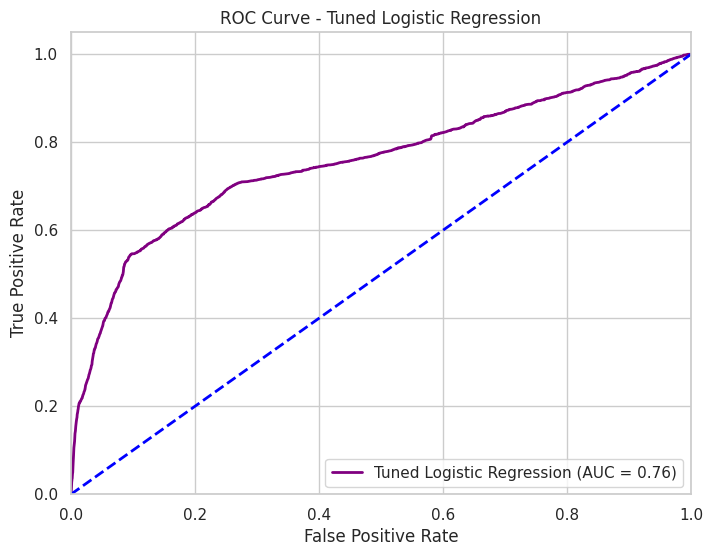

In [31]:
# Retrieve the best Logistic Regression model
best_log_reg = log_reg_grid.best_estimator_

# Predict probabilities on the reduced test set
y_proba_log_reg = best_log_reg.predict_proba(X_test_reduced)[:, 1]

# Calc ROC curve and AUC for the best Logistic Regression model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_proba_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Plot ROC curve for the tuned Logistic Regression model
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_log_reg, y=tpr_log_reg, color='purple', lw=2, label=f'Tuned Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## SVM Model

In [32]:
from sklearn.svm import LinearSVC

# Define parameter grid
svm_linear_params = {
    'C': [0.01, 0.1, 1, 10, 100]
}

# LinearSVC with dual=False and increased max_iter
linear_svc_grid_dual = GridSearchCV(LinearSVC(max_iter=10000, dual=False, random_state=42), svm_linear_params, cv=3)
linear_svc_grid_dual.fit(X_train_reduced, y_train)

print("Best Parameters for Linear SVC:", linear_svc_grid_dual.best_params_)
print("SVC Score with Grid Search:", linear_svc_grid_dual.score(X_test_reduced, y_test))

# Due to constant warnings/problems I used Linear SVC to get a working output

Best Parameters for Linear SVC: {'C': 0.01}
SVC Score with Grid Search: 0.8966131186015458


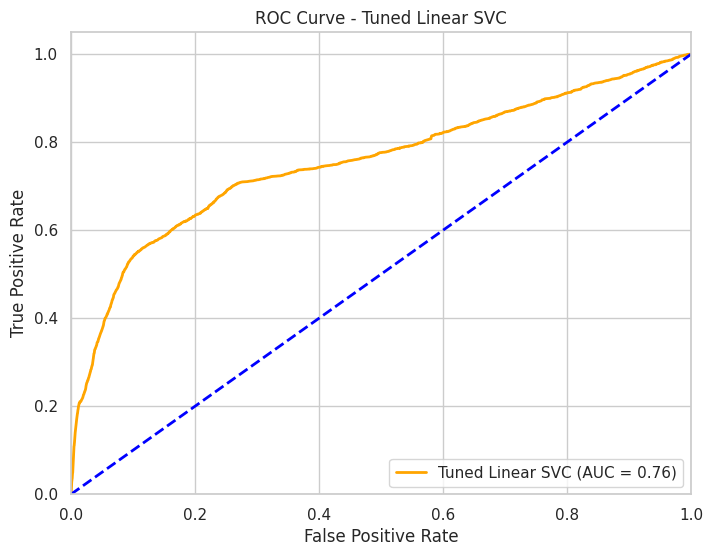

In [33]:
# Retrieve the best Linear SVC model
best_svc = linear_svc_grid_dual.best_estimator_

# Calculate decision function scores on the reduced test set
y_scores_svc = best_svc.decision_function(X_test_reduced)

# Calculate ROC curve and AUC for the best Linear SVC model
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_scores_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot the ROC curve for the tuned Linear SVC model
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_svc, y=tpr_svc, color='orange', lw=2, label=f'Tuned Linear SVC (AUC = {roc_auc_svc:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Linear SVC')
plt.legend(loc="lower right")
plt.show()

# Conclusion:

## Test/Training Accuracy Results

Prior to improving the model, Decision Tree had the highest training accuracy at 0.9954 but also the lowest test accuracy at 0.8375. This would suggest overfitting could be occuring in the model. The SVM model had the longest training time by a wide margin at 27.22s whereas Log Regression was at 2.58s and the others were at 0.01 and 0.32. This could be because the algorithm of the vector. Logistric Regression had the highest test accuracy at 0.8963 with SVM close behind at 0.8948.

In short, Log Regression produced the best results so that would be the best model to use.

After changing the train/test split to 40/60, SVM training time went down to 6.97s. Decision Tree still had the highest training accuracy at 0.9975. Once again, Log regression produced the best results with the highest test accuracy at 0.8988. Overall, there were slight improvements in the majority of the categories, training time went down, training accuracy increased slightly, and test accuracy increased slightly. Log Regression is still the best model to use.



## Grid Search and ROC Curves Results

Prior to using the grid search, the Log Regression had the highest AUC of 0.78, KNN had an AUC of 0.72, Decision Tree had an AUC of 0.62, and SVM had an AUC of 0.65. For Decision Tree and SVM the ROC has oddly shapped to say the least. 

After using Grid Search, I was able to find the following:

#### Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}. 

Best Score for Decision Tree was 0.9019119878603945.

#### KNN:
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}. 

Best Score for KNN: 0.8977238239757208.

#### Log Regression:
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}

Logistic Regression Score with Grid Search: 0.8980293772508396

#### SVM:
Best Parameters for Linear SVC: {'C': 0.01}

SVC Score with Grid Search: 0.8966131186015458

The ROC curves for each method also changed: Log Regression regressed to 0.76, KNN had an AUC of 0.76, Decision tree improved to 0.78, and SVM also improved to 0.76. The shape looked alot better for all models. Overall, it seems like Decision Tree produced the best outputs. I personally would still use Logistic Regression due to potential overfitting.